In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [2]:
df = web.DataReader('^BSESN', data_source='yahoo', start='2018-01-01', end='2020-06-30')

In [3]:
df=df.reset_index(['Date'])
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-01,34101.128906,33766.148438,34059.988281,33812.750000,7500.0,33812.750000
1,2018-01-02,33964.140625,33703.371094,33913.550781,33812.261719,10600.0,33812.261719
2,2018-01-03,33998.371094,33765.429688,33929.609375,33793.378906,9000.0,33793.378906
3,2018-01-04,33995.398438,33802.128906,33912.488281,33969.640625,10500.0,33969.640625
4,2018-01-05,34188.851562,34020.839844,34021.269531,34153.851562,14700.0,34153.851562


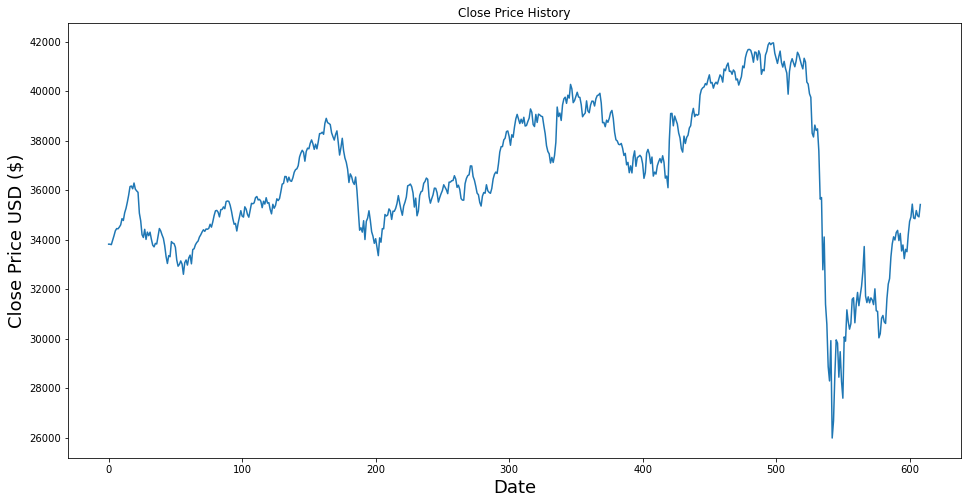

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
dt=pd.read_csv('../input/india-headlines-news-dataset/india-news-headlines.csv')

In [7]:
dt.drop(columns=['headline_category'],axis=1,inplace=True)
dt['publish_date']=pd.to_datetime(dt['publish_date'],format='%Y%m%d')
dt=dt.rename(columns={'publish_date':'Date'})
dt.head()

,Date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


In [8]:
dt=dt[(dt['Date'].dt.year >= 2018)]

In [9]:
dt.shape

(527615, 2)

In [10]:
dt.dropna(inplace=True)
 
blanks = []  # start with an empty list
 
for i,lb,rv in dt.itertuples():  
    if type(rv)==str:            
        if rv.isspace():         # test 'review' for spaces
            blanks.append(i)     # add matching index numbers to the list
dt.drop(blanks, inplace=True)

In [11]:
dt=dt.reset_index(drop=True)
dt

,Date,headline_text
0,2018-01-01,5 easy beauty resolutions you can follow in 2017
1,2018-01-01,Survey proposes law to promote transparency of...
2,2018-01-01,'We've to depend on overpriced cab services to...
3,2018-01-01,planning to make your diet better in 2018 just...
4,2018-01-01,New Year Resolutions 2018: Let's aim for these...
...,...,...
527610,2020-06-30,why tiktok removed 1 65 crore videos in india
527611,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
527612,2020-06-30,kangana ranaut gets a doll version of herself ...
527613,2020-06-30,meezaan jaffrey reminisces his childhood days ...


In [12]:
data=pd.merge(dt,df,how='outer',on='Date')
data.head()

,Date,headline_text,High,Low,Open,Close,Volume,Adj Close
0,2018-01-01,5 easy beauty resolutions you can follow in 2017,34101.128906,33766.148438,34059.988281,33812.75,7500.0,33812.75
1,2018-01-01,Survey proposes law to promote transparency of...,34101.128906,33766.148438,34059.988281,33812.75,7500.0,33812.75
2,2018-01-01,'We've to depend on overpriced cab services to...,34101.128906,33766.148438,34059.988281,33812.75,7500.0,33812.75
3,2018-01-01,planning to make your diet better in 2018 just...,34101.128906,33766.148438,34059.988281,33812.75,7500.0,33812.75
4,2018-01-01,New Year Resolutions 2018: Let's aim for these...,34101.128906,33766.148438,34059.988281,33812.75,7500.0,33812.75


In [13]:
del data['High']
del data['Low']
del data['Open']
del data['Volume']

In [14]:
data.dropna(0)

,Date,headline_text,Close,Adj Close
0,2018-01-01,5 easy beauty resolutions you can follow in 2017,33812.750000,33812.750000
1,2018-01-01,Survey proposes law to promote transparency of...,33812.750000,33812.750000
2,2018-01-01,'We've to depend on overpriced cab services to...,33812.750000,33812.750000
3,2018-01-01,planning to make your diet better in 2018 just...,33812.750000,33812.750000
4,2018-01-01,New Year Resolutions 2018: Let's aim for these...,33812.750000,33812.750000
...,...,...,...,...
527610,2020-06-30,why tiktok removed 1 65 crore videos in india,34915.800781,34915.800781
527611,2020-06-30,apurva asrani calls alia bhatts mother soni ra...,34915.800781,34915.800781
527612,2020-06-30,kangana ranaut gets a doll version of herself ...,34915.800781,34915.800781
527613,2020-06-30,meezaan jaffrey reminisces his childhood days ...,34915.800781,34915.800781


In [15]:
data['Adj Close'].fillna(0,inplace=True)

In [16]:
data.dtypes

Date             datetime64[ns]
headline_text            object
Close                   float64
Adj Close               float64
dtype: object

In [17]:
data = data[['Date','Close', 'headline_text']]

In [18]:
data=data.dropna(0)
data = data.reset_index(drop = True) 

In [19]:
data.isnull().sum()

Date             0
Close            0
headline_text    0
dtype: int64

In [20]:
data

,Date,Close,headline_text
0,2018-01-01,33812.750000,5 easy beauty resolutions you can follow in 2017
1,2018-01-01,33812.750000,Survey proposes law to promote transparency of...
2,2018-01-01,33812.750000,'We've to depend on overpriced cab services to...
3,2018-01-01,33812.750000,planning to make your diet better in 2018 just...
4,2018-01-01,33812.750000,New Year Resolutions 2018: Let's aim for these...
...,...,...,...
352165,2020-06-30,34915.800781,why tiktok removed 1 65 crore videos in india
352166,2020-06-30,34915.800781,apurva asrani calls alia bhatts mother soni ra...
352167,2020-06-30,34915.800781,kangana ranaut gets a doll version of herself ...
352168,2020-06-30,34915.800781,meezaan jaffrey reminisces his childhood days ...


In [21]:
data['compound']=''
data['neg']=''
data['neu']=''
data['pos']=''

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sid = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [23]:
data['scores'] = data['headline_text'].apply(lambda review: sid.polarity_scores(review))
data['compound']  = data['scores'].apply(lambda s : s['compound']) 
data['neg']  = data['scores'].apply(lambda s : s['neg'])
data['neu']  = data['scores'].apply(lambda s : s['neu'])
data['pos']  = data['scores'].apply(lambda s : s['pos'])

In [24]:
data

,Date,Close,headline_text,compound,neg,neu,pos,scores
0,2018-01-01,33812.750000,5 easy beauty resolutions you can follow in 2017,0.7717,0.000,0.472,0.528,"{'neg': 0.0, 'neu': 0.472, 'pos': 0.528, 'comp..."
1,2018-01-01,33812.750000,Survey proposes law to promote transparency of...,0.3818,0.000,0.755,0.245,"{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp..."
2,2018-01-01,33812.750000,'We've to depend on overpriced cab services to...,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2018-01-01,33812.750000,planning to make your diet better in 2018 just...,0.4404,0.000,0.805,0.195,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp..."
4,2018-01-01,33812.750000,New Year Resolutions 2018: Let's aim for these...,-0.0772,0.106,0.894,0.000,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'comp..."
...,...,...,...,...,...,...,...,...
352165,2020-06-30,34915.800781,why tiktok removed 1 65 crore videos in india,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
352166,2020-06-30,34915.800781,apurva asrani calls alia bhatts mother soni ra...,0.0000,0.000,1.000,0.000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
352167,2020-06-30,34915.800781,kangana ranaut gets a doll version of herself ...,0.2960,0.000,0.885,0.115,"{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'comp..."
352168,2020-06-30,34915.800781,meezaan jaffrey reminisces his childhood days ...,0.4939,0.000,0.814,0.186,"{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp..."


In [25]:
final_data=data[['Date','compound','neg','neu','pos','Close']]

In [26]:
final_data

,Date,compound,neg,neu,pos,Close
0,2018-01-01,0.7717,0.000,0.472,0.528,33812.750000
1,2018-01-01,0.3818,0.000,0.755,0.245,33812.750000
2,2018-01-01,0.0000,0.000,1.000,0.000,33812.750000
3,2018-01-01,0.4404,0.000,0.805,0.195,33812.750000
4,2018-01-01,-0.0772,0.106,0.894,0.000,33812.750000
...,...,...,...,...,...,...
352165,2020-06-30,0.0000,0.000,1.000,0.000,34915.800781
352166,2020-06-30,0.0000,0.000,1.000,0.000,34915.800781
352167,2020-06-30,0.2960,0.000,0.885,0.115,34915.800781
352168,2020-06-30,0.4939,0.000,0.814,0.186,34915.800781


In [27]:
X=final_data[['compound','neg','neu','pos']]
Y=final_data[['Close']]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

In [30]:
from sklearn import preprocessing
mms=preprocessing.MinMaxScaler()
X_train=mms.fit_transform(X_train)
X_test=mms.fit_transform(X_test)
Y_train=mms.fit_transform(Y_train)
Y_test=mms.fit_transform(Y_test)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras import losses
from keras import activations

In [32]:
model=Sequential()

In [33]:
model.add(Dense(4,activation=activations.sigmoid,input_shape=(4,)))
# model.add(Dense(3,activation='relu',input_shape=(3,)))
model.add(Dense(100,activation=activations.sigmoid))
model.add(Dense(100,activation=activations.sigmoid))
model.add(Dense(100,activation=activations.sigmoid))
model.add(Dense(100,activation=activations.sigmoid))
model.add(Dense(100,activation=activations.sigmoid))
model.add(Dense(1,activation=activations.sigmoid))

In [34]:
model.compile(optimizer='adam',loss=losses.mean_absolute_error)

In [35]:
model.fit(X_train,Y_train,verbose=2)

7374/7374 - 15s - loss: 0.1377


In [36]:
y_pred=model.predict(X_test)

In [37]:
print(r2_score(Y_test,y_pred))

-0.002419006924195388


In [38]:
y_pred

array([[0.66092014],
       [0.66092014],
       [0.6609201 ],
       ...,
       [0.66092014],
       [0.6609201 ],
       [0.6609201 ]], dtype=float32)

In [39]:
Y_test

array([[0.45868901],
       [0.59901   ],
       [0.92716663],
       ...,
       [0.5291167 ],
       [0.71044364],
       [0.81132447]])

In [40]:
model.evaluate(X_train,Y_train)

7374/7374 [==============================] - 10s 1ms/step - loss: 0.1387


0.1386895775794983

In [41]:
model.evaluate(X_test,Y_test)

3632/3632 [==============================] - 5s 2ms/step - loss: 0.1386


0.13857926428318024

In [42]:
model.evaluate(X_test,y_pred)

3632/3632 [==============================] - 6s 2ms/step - loss: 0.0000e+00


0.0

In [43]:
model.layers[0].get_weights()

[array([[-0.56858695, -0.37018025,  0.21274781, -0.7616031 ],
        [ 0.49432385,  0.29404825, -0.5707292 ,  0.10453425],
        [ 0.38216266, -0.6177474 , -0.06299996, -0.71637774],
        [ 0.5554231 , -0.17513655,  0.5817616 ,  0.5351395 ]],
       dtype=float32),
 array([0.17470165, 0.08508462, 0.05980535, 0.05037799], dtype=float32)]

MLP 

In [44]:
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error

In [45]:
MLP=MLPRegressor(hidden_layer_sizes=(3,2),learning_rate='adaptive')
MLP.fit(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(hidden_layer_sizes=(3, 2), learning_rate='adaptive')

In [46]:
Y_predicted=MLP.predict(X_test)

In [47]:
print(r2_score(Y_test,Y_predicted))

0.0006773143825098416
